# KNN Algorithm

`This notebook follows a basic implementation of KNN without using any library.
It helps in understanding KNN from basic.
After  the basic implemenation sklearn library is used for another example

In [3]:
import numpy as np
import operator
import pandas as pd

In [4]:
def createDataSet():
    group= np.array([[1.0,1.1], [1.0,1.0], [0.0], [0,0.1]])
    labels= ['A','A','B','B']
    return group,labels

The claissifer method itself

In [5]:
def classify(X, dataset, labels, k):

    distances = eucledianDistance (dataset,X)
    distances=np.array(distances)
    sortedDistanceIndices = distances.argsort()
    classCount={}
    for i in range(k):
        voteILabel = labels[sortedDistanceIndices[i]]
        classCount[voteILabel]=classCount.get(voteILabel,0)+1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

Method to calculate Eucledian distance

In [6]:

def eucledianDistance(dataset,X):
    distances=[]
    for i in dataset:
        distances.append(np.linalg.norm(np.array(i)-X))
    return distances

Testing the algorithm for a particular point

In [7]:
group,label=createDataSet()
print (classify([0,0.5],group,label,3))

B


We see the point is classified to B

# KNN using Library for a different dataset

In [8]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [9]:
datingDataMat= pd.read_csv('resources/datingTestSet2.csv')
datingLabels = datingDataMat['Liking']
datingDataMat=datingDataMat.drop(['Liking'],axis=1)

In [10]:
datingDataMat.head()

,FrequentFlyer,VGHours,Icecream
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296


### Having a look at present data

E:\Anaconda\envs\MlinAction\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


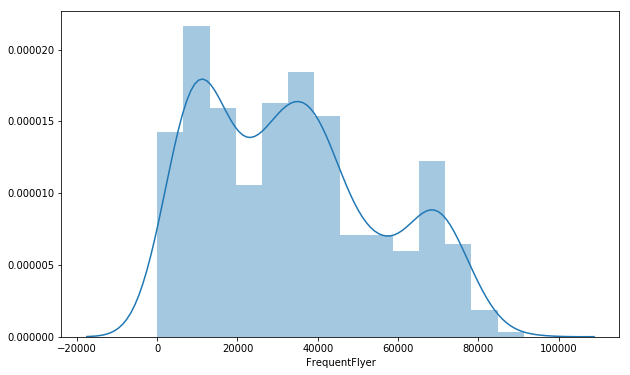

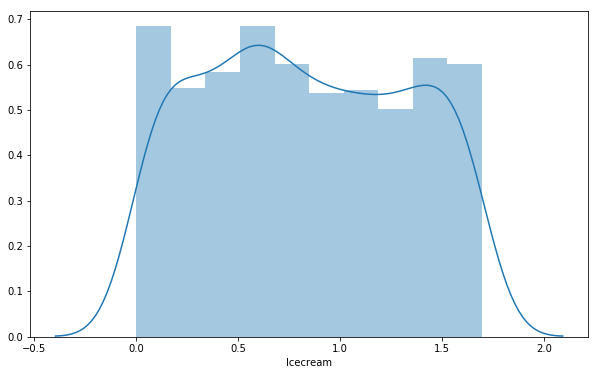

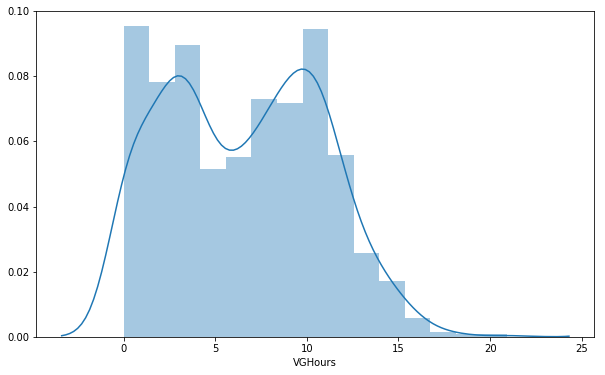

In [11]:
plt.figure(figsize=(10,6))
sb.distplot(datingDataMat.FrequentFlyer)
plt.show()

plt.figure(figsize=(10,6))m
sb.distplot(datingDataMat.Icecream)
plt.show()

plt.figure(figsize=(10,6))
sb.distplot(datingDataMat.VGHours)
plt.show()

The graphs show that the the distributions are mostly normal in nature


Instead of the above defined KNN implementation, we will be using SKlearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(datingDataMat, datingLabels, test_size=0.25, random_state=0)
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, pred))

0.804


In [23]:
knn.predict([[37708,2.991551,0.83392]])

array(['didntLike'], dtype=object)

While going through further documentation, KNN works better when the data is normalized. So Let the columns be normalized.
Normaization without library will be ,<br>
X<sub>Std</sub> = X<sub>value</sub> - X<sub>min</sub> / X<sub>max</sub>-X<sub>min</sub><br>
Instead we will use min max scalar from sk learn to normalize. 
The difference is, this method gives the scaled value.<br>
X<sub>Scaled=</sub> =X<sub>Std</sub> * (max-min) + min , where min,max is the feature range

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
normaized_data= min_max_scaler.fit_transform(datingDataMat)
normaized_data = pd.DataFrame(normaized_data,columns=['FreqFlyer','VgHours','Icecream'])

In [48]:
normaized_data.head()

,FreqFlyer,VgHours,Icecrea
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578


E:\Anaconda\envs\MlinAction\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


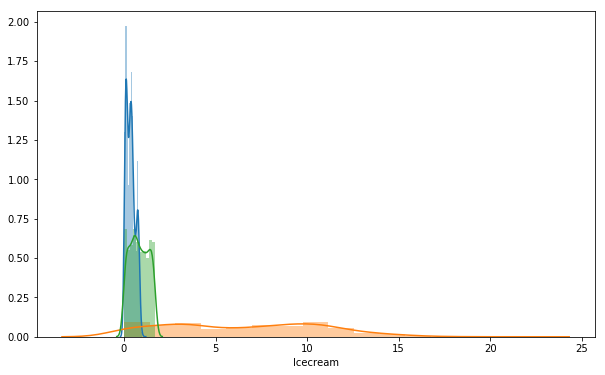

In [52]:
plt.figure(figsize=(10,6))
sb.distplot(normaized_data.FreqFlyer)
sb.distplot(datingDataMat.VGHours)
sb.distplot(datingDataMat.Icecream)
plt.show()


E:\Anaconda\envs\MlinAction\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


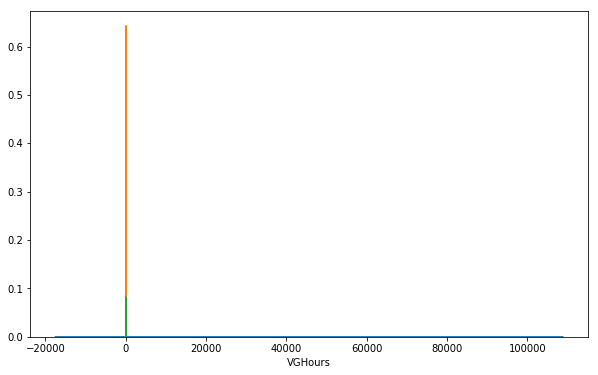

In [53]:
plt.figure(figsize=(10,6))
sb.distplot(datingDataMat.FrequentFlyer)
sb.distplot(datingDataMat.Icecream)
sb.distplot(datingDataMat.VGHours)
plt.show()

Comparing all the attributs in one graph before and after transformation.  After transformation the graph is less widespread

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(normaized_data, datingLabels, test_size=0.25, random_state=42)
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, pred))

0.924


Much improvement in performance compared to non transformed data.

In [57]:
knn.predict([[37708,2.991551,0.83392]])

array(['didntLike'], dtype=object)